# **[ EXPLORATORY DATA ANALYSIS ON DATASET USING APK REPRESENTATION ]**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

# **LOADING THE DATASET # 1**

In [ ]:
import os
for dirname, _, filenames in os.walk('dataset5-features-categories.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
%pip install -q androguard


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.9/943.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account a

In [ ]:
%pip install --upgrade sqlalchemy


In [ ]:
try:
    from androguard.core.bytecodes.apk import APK
    from androguard.misc import AnalyzeAPK
    print("Androguard is installed correctly.")
except ImportError as e:
    print(f"Error importing Androguard: {e}")


Error importing Androguard: No module named 'androguard.core.bytecodes'


In [ ]:
%pip install scikit-plot


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import pickle
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_recall_curve, recall_score, roc_curve, precision_score
import warnings


from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

import re
# from androguard.core.bytecodes.apk import APK
# from androguard.core.bytecodes.dvm import DalvikVMFormat
from androguard.misc import AnalyzeAPK

from mlxtend.plotting import plot_confusion_matrix
from scikitplot.metrics import plot_cumulative_gain, plot_precision_recall, plot_roc_curve

# **LOADING THE DATASET # 2**

In [ ]:
data = pd.read_csv("drebin-215-dataset-5560malware-9476-benign.csv", encoding="utf-8", low_memory=False, na_values="?")
data.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [ ]:
data.shape


(15036, 216)

In [ ]:
data.isnull().sum().sum()


5

In [ ]:
feature_df = pd.read_csv("/content/dataset5-features-categories.csv", header=None, names=["X", "Category"])
feature_df.head()

,X,Category
0,transact,API call signature
1,onServiceConnected,API call signature
2,bindService,API call signature
3,attachInterface,API call signature
4,ServiceConnection,API call signature


In [ ]:
feature_df["Category"].value_counts()


Category
Manifest Permission    113
API call signature      73
Intent                  23
Commands signature       6
B=Benign; S=Malware      1
Name: count, dtype: int64

In [ ]:
feature_df.shape


(216, 2)

In [ ]:
feature_df.isnull().sum().sum()

0

In [ ]:
feature_df[feature_df["Category"] == "Manifest Permission"]

,X,Category
6,SEND_SMS,Manifest Permission
13,READ_PHONE_STATE,Manifest Permission
19,GET_ACCOUNTS,Manifest Permission
20,RECEIVE_SMS,Manifest Permission
22,READ_SMS,Manifest Permission
...,...,...
210,WRITE_EXTERNAL_STORAGE,Manifest Permission
211,ACCESS_FINE_LOCATION,Manifest Permission
212,SET_WALLPAPER_HINTS,Manifest Permission
213,SET_PREFERRED_APPLICATIONS,Manifest Permission


In [ ]:
feature_df[feature_df["Category"] == "API call signature"]

,X,Category
0,transact,API call signature
1,onServiceConnected,API call signature
2,bindService,API call signature
3,attachInterface,API call signature
4,ServiceConnection,API call signature
...,...,...
167,ProcessBuilder,API call signature
171,Ljava.lang.Class.getResource,API call signature
172,defineClass,API call signature
180,findClass,API call signature


In [ ]:
feature_df[feature_df["Category"] == "Intent"]

,X,Category
25,android.intent.action.BOOT_COMPLETED,Intent
53,android.intent.action.PACKAGE_REPLACED,Intent
55,android.intent.action.SEND_MULTIPLE,Intent
66,android.intent.action.TIME_SET,Intent
73,android.intent.action.PACKAGE_REMOVED,Intent
74,android.intent.action.TIMEZONE_CHANGED,Intent
81,android.intent.action.ACTION_POWER_DISCONNECTED,Intent
82,android.intent.action.PACKAGE_ADDED,Intent
97,android.intent.action.ACTION_SHUTDOWN,Intent
107,android.intent.action.PACKAGE_DATA_CLEARED,Intent


In [ ]:
feature_df[feature_df["Category"] == "Commands signature"]

,X,Category
44,mount,Commands signature
79,chmod,Commands signature
96,remount,Commands signature
100,chown,Commands signature
141,/system/bin,Commands signature
149,/system/app,Commands signature


In [ ]:
data["class"] = data["class"].map({"B": 0, "S": 1})

In [ ]:
data.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
data = data.dropna()

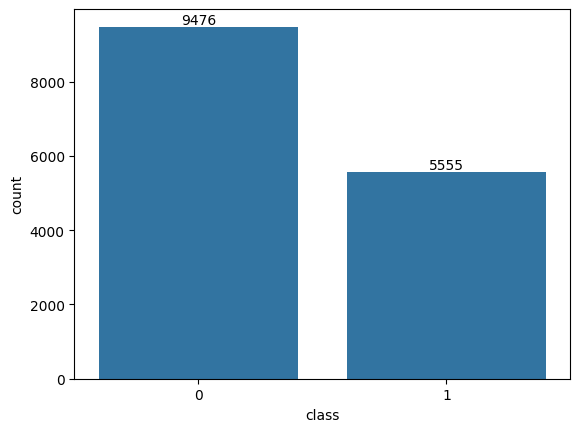

In [ ]:
plt.figure()
ax = sns.countplot(data=data, x="class")
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [ ]:
X = data.drop("class", axis=1)
y = data["class"]
# Verify the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (15031, 215)
Shape of y: (15031,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **RESAMPLING THE DATASET**

In [ ]:
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

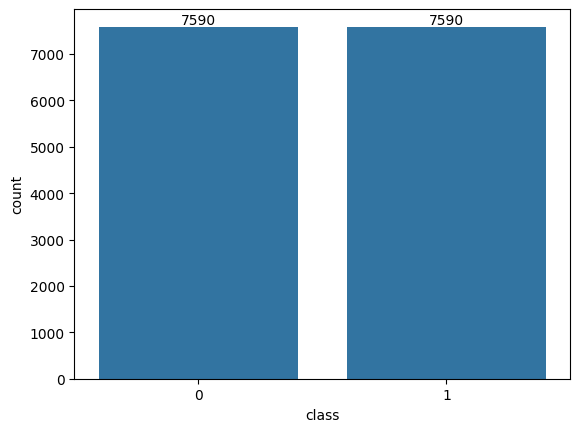

In [ ]:
plt.figure()
ax = sns.countplot(x=y_train)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

# **[MODELS EVALUATION]**

# **1 - LOGISTIC REGRESSION**

In [ ]:
logreg = LogisticRegression()
start = time.time()
logreg.fit(X_train, y_train)
end = time.time()
logreg_time = end - start
print("Logistic Regression Train Time:", logreg_time)

Logistic Regression Train Time: 0.5987231731414795


In [ ]:
logreg_pred_train = logreg.predict(X_train)
logreg_pred_test = logreg.predict(X_test)

logreg_train_score = accuracy_score(logreg_pred_train, y_train)
logreg_test_score = accuracy_score(logreg_pred_test, y_test)
print("Logistic Regression Train Score:", logreg_train_score)
print("Logistic Regression Test Score:", logreg_test_score)

Logistic Regression Train Score: 0.9814888010540185
Logistic Regression Test Score: 0.9767209843698038


In [ ]:
logreg_precision_score = precision_score(y_test, logreg_pred_test)
logreg_f1_score = f1_score(y_test, logreg_pred_test)
logreg_recall_score = recall_score(y_test, logreg_pred_test)
logreg_accuracy_score = accuracy_score(y_test, logreg_pred_test)

print("Logistic Regression Precision Score:", logreg_precision_score)
print("Logistic Regression F1 Score:", logreg_f1_score)
print("Logistic Regression Recall Score:", logreg_recall_score)
print("Logistic Regression Accuracy Score:", logreg_accuracy_score)

Logistic Regression Precision Score: 0.961369622475856
Logistic Regression F1 Score: 0.9690265486725664
Logistic Regression Recall Score: 0.9768064228367529
Logistic Regression Accuracy Score: 0.9767209843698038


In [ ]:
print(classification_report(y_test, logreg_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1886
           1       0.96      0.98      0.97      1121

    accuracy                           0.98      3007
   macro avg       0.97      0.98      0.98      3007
weighted avg       0.98      0.98      0.98      3007



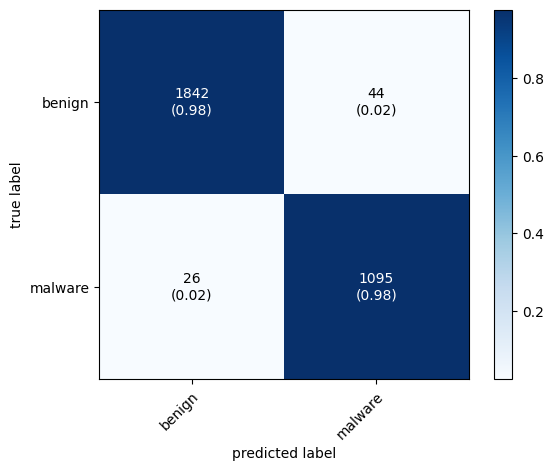

In [ ]:
logreg_cm = confusion_matrix(y_test, logreg_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=logreg_cm, show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
plt.show()

In [ ]:
logreg_test_proba = logreg.predict_proba(X_test)

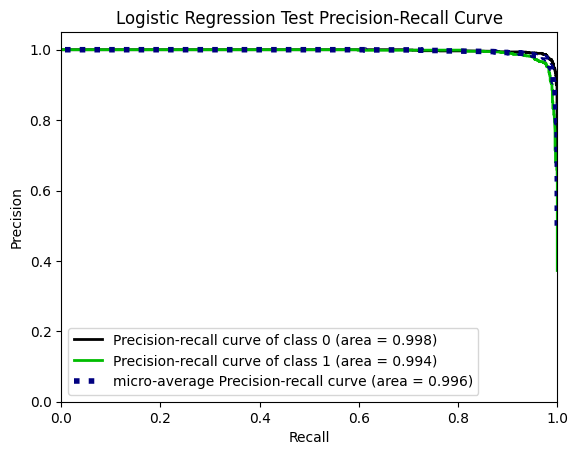

In [ ]:
plot_precision_recall(y_test, logreg_test_proba, title="Logistic Regression Test Precision-Recall Curve")
plt.show()

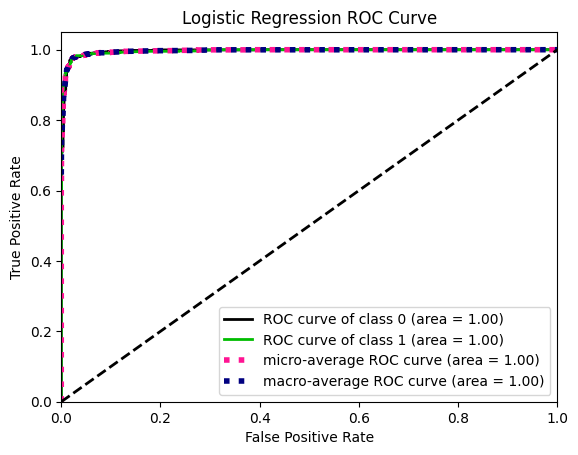

In [ ]:
plot_roc_curve(y_test, logreg_test_proba, title="Logistic Regression ROC Curve")
plt.show()

# **2 - RANDOM FOREST CLASSIFIER**

In [ ]:
rf = RandomForestClassifier()
start = time.time()
rf.fit(X_train, y_train)
end = time.time()
rf_time = end - start
print("Random Forest Train Time:", rf_time)

Random Forest Train Time: 1.60491943359375


In [ ]:
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

rf_train_score = accuracy_score(rf_pred_train, y_train)
rf_test_score = accuracy_score(rf_pred_test, y_test)
print("Random Forest Train Score:", rf_train_score)
print("Random Forest Test Score:", rf_test_score)

Random Forest Train Score: 0.9994071146245059
Random Forest Test Score: 0.9866977053541736


In [ ]:
rf_precision_score = precision_score(y_test, rf_pred_test)
rf_f1_score = f1_score(y_test, rf_pred_test)
rf_recall_score = recall_score(y_test, rf_pred_test)
rf_accuracy_score = accuracy_score(y_test, rf_pred_test)

print("Random Forest Precision Score:", rf_precision_score)
print("Random Forest F1 Score:", rf_f1_score)
print("Random Forest Recall Score:", rf_recall_score)
print("Random Forest Accuracy Score:", rf_accuracy_score)

Random Forest Precision Score: 0.9927073837739289
Random Forest F1 Score: 0.9819657348963029
Random Forest Recall Score: 0.9714540588760036
Random Forest Accuracy Score: 0.9866977053541736


In [ ]:
print(classification_report(y_test, rf_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1886
           1       0.99      0.97      0.98      1121

    accuracy                           0.99      3007
   macro avg       0.99      0.98      0.99      3007
weighted avg       0.99      0.99      0.99      3007



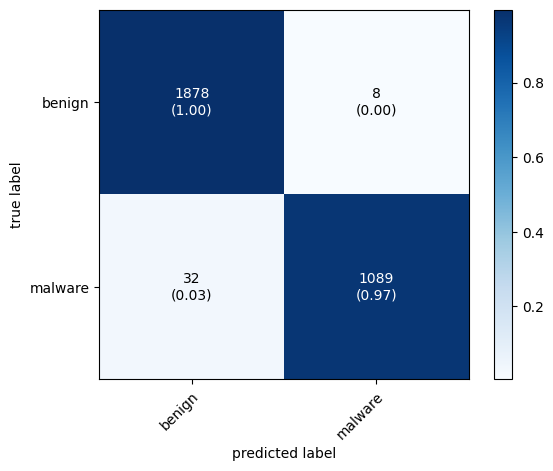

In [ ]:
rf_cm = confusion_matrix(y_test, rf_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=rf_cm, show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
plt.show()

In [ ]:
rf_test_proba = rf.predict_proba(X_test)

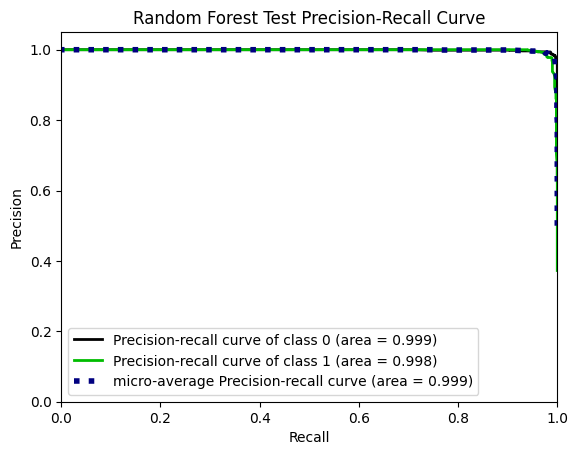

In [ ]:
plot_precision_recall(y_test, rf_test_proba, title="Random Forest Test Precision-Recall Curve")
plt.show()

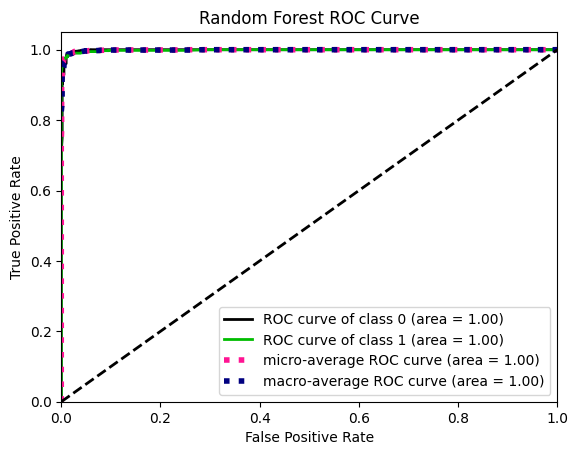

In [ ]:
plot_roc_curve(y_test, rf_test_proba, title="Random Forest ROC Curve")
plt.show()

In [ ]:
# Plot the top 30 feature importances

plt.figure(figsize=(10, 8))
feat_importances.nlargest(30).plot(kind='barh',color='purple')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 30 Feature Importances')
plt.show()

NameError: name 'feat_importances' is not defined

<Figure size 1000x800 with 0 Axes>

# **3 - Decision Tree**

In [ ]:
dt = DecisionTreeClassifier()
start = time.time()
dt.fit(X_train, y_train)
end = time.time()
dt_time = end - start
print("Decision Tree Train Time:", dt_time)

Decision Tree Train Time: 0.5907719135284424


In [ ]:
dt_pred_train = dt.predict(X_train)
dt_pred_test = dt.predict(X_test)

dt_train_score = accuracy_score(dt_pred_train, y_train)
dt_test_score = accuracy_score(dt_pred_test, y_test)
print("Decision Tree Train Score:", dt_train_score)
print("Decision Tree Test Score:", dt_test_score)

Decision Tree Train Score: 0.9994071146245059
Decision Tree Test Score: 0.9707349517791819


In [ ]:
dt_precision_score = precision_score(y_test, dt_pred_test)
dt_f1_score = f1_score(y_test, dt_pred_test)
dt_recall_score = recall_score(y_test, dt_pred_test)
dt_accuracy_score = accuracy_score(y_test, dt_pred_test)

print("Decision Tree Precision Score:", dt_precision_score)
print("Decision Tree F1 Score:", dt_f1_score)
print("Decision Tree Recall Score:", dt_recall_score)
print("Decision Tree Accuracy Score:", dt_accuracy_score)

Decision Tree Precision Score: 0.9632286995515695
Decision Tree F1 Score: 0.9606440071556351
Decision Tree Recall Score: 0.9580731489741302
Decision Tree Accuracy Score: 0.9707349517791819


In [ ]:
print(classification_report(y_test, dt_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1886
           1       0.96      0.96      0.96      1121

    accuracy                           0.97      3007
   macro avg       0.97      0.97      0.97      3007
weighted avg       0.97      0.97      0.97      3007



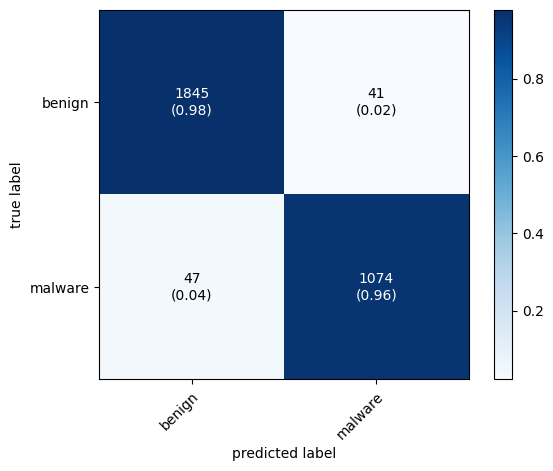

In [ ]:
dt_cm = confusion_matrix(y_test, dt_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=dt_cm, show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
plt.show()

In [ ]:
dt_test_proba = dt.predict_proba(X_test)

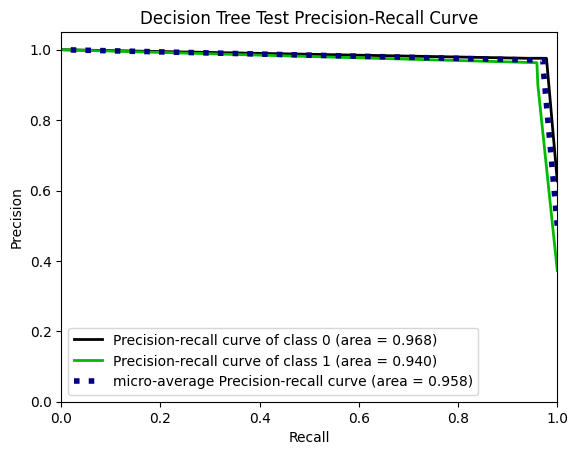

In [ ]:
plot_precision_recall(y_test, dt_test_proba, title="Decision Tree Test Precision-Recall Curve")
plt.show()

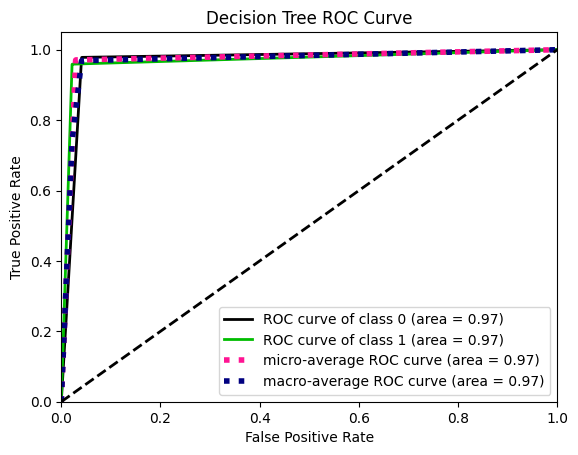

In [ ]:
plot_roc_curve(y_test, dt_test_proba, title="Decision Tree ROC Curve")
plt.show()

# **4 - XGB CLASSIFIER**

In [ ]:
xgb = XGBClassifier()
start = time.time()
xgb.fit(X_train, y_train)
end = time.time()
xgb_time = end - start
print("XGBClassifier Train Time:", xgb_time)

XGBClassifier Train Time: 2.4889731407165527


In [ ]:
xgb_pred_train = xgb.predict(X_train)
xgb_pred_test = xgb.predict(X_test)

xgb_train_score = accuracy_score(xgb_pred_train, y_train)
xgb_test_score = accuracy_score(xgb_pred_test, y_test)
print("XGBClassifier Train Score:", xgb_train_score)
print("XGBClassifier Test Score:", xgb_test_score)

XGBClassifier Train Score: 0.9980237154150198
XGBClassifier Test Score: 0.985367475889591


In [ ]:
xgb_precision_score = precision_score(y_test, xgb_pred_test)
xgb_f1_score = f1_score(y_test, xgb_pred_test)
xgb_recall_score = recall_score(y_test, xgb_pred_test)
xgb_accuracy_score = accuracy_score(y_test, xgb_pred_test)

print("XGBClassifier Precision Score:", xgb_precision_score)
print("XGBClassifier F1 Score:", xgb_f1_score)
print("XGBClassifier Recall Score:", xgb_recall_score)
print("XGBClassifier Accuracy Score:", xgb_accuracy_score)

XGBClassifier Precision Score: 0.9855725879170424
XGBClassifier F1 Score: 0.9802690582959641
XGBClassifier Recall Score: 0.9750223015165032
XGBClassifier Accuracy Score: 0.985367475889591


In [ ]:
print(classification_report(y_test, xgb_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1886
           1       0.99      0.98      0.98      1121

    accuracy                           0.99      3007
   macro avg       0.99      0.98      0.98      3007
weighted avg       0.99      0.99      0.99      3007



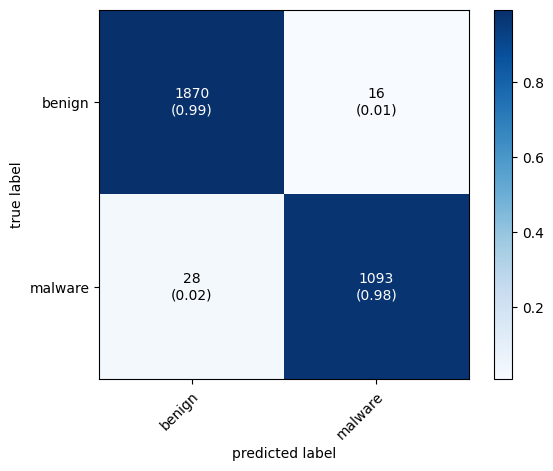

In [ ]:
xgb_cm = confusion_matrix(y_test, xgb_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=xgb_cm, show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
plt.show()

In [ ]:
xgb_test_proba = xgb.predict_proba(X_test)

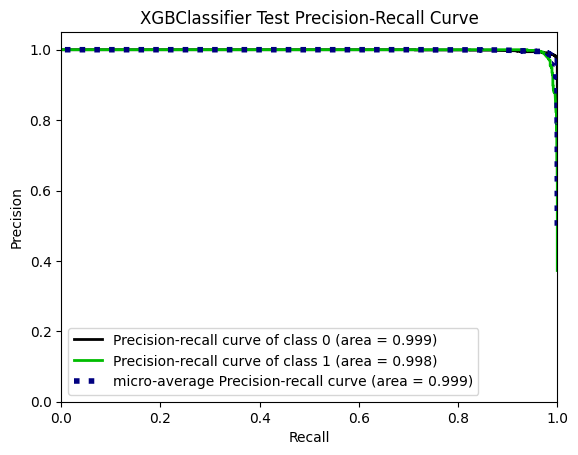

In [ ]:
plot_precision_recall(y_test, xgb_test_proba, title="XGBClassifier Test Precision-Recall Curve")
plt.show()

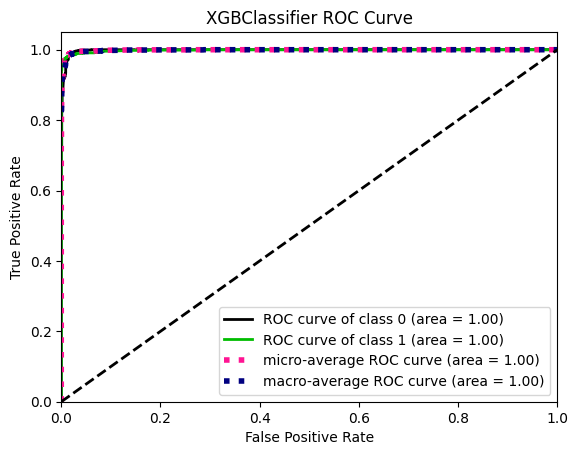

In [ ]:
plot_roc_curve(y_test, xgb_test_proba, title="XGBClassifier ROC Curve")
plt.show()

# **FINAL RESULTS**

In [ ]:
labels = ["LR", "DT", "RF", "XGB"]
scores = [logreg_test_score, dt_test_score, rf_test_score, xgb_test_score]

In [1]:
plt.figure()
ax = sns.barplot(x=labels, y=scores)
ax.set_title("Trained Models Accuracy",color="purple")
for container in ax.containers:
    ax.bar_label(container)
plt.show()  # Show the plot

NameError: name 'plt' is not defined

# **TESTING THE DATASET**

In [ ]:
permissions_list = feature_df[feature_df["Category"] == "Manifest Permission"].X.unique()
api_call_signatures = feature_df[feature_df["Category"] == "API call signature"].X.unique()
intents = feature_df[feature_df["Category"] == "Intent"].X.unique()
keywords = feature_df[feature_df["Category"] == "Commands signature"].X.unique()

In [ ]:
columns = ["filename"]
for col in data.columns:
    columns.append(col)

In [ ]:
test_df = pd.DataFrame(columns=columns)

In [ ]:
columns = ["filename"]
for col in data.columns:
    columns.append(col)

In [ ]:
test_df = pd.DataFrame(columns=columns)

In [ ]:
apk_file_path = "/home/alper/Downloads/app-debug.apk"

In [ ]:
test_df.loc[0, "filename"] = apk_file_path

In [ ]:
test_df.head()

,filename,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,/home/alper/Downloads/app-debug.apk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ***APK FILES CONVERSIONS USING APK ***

In [ ]:
from androguard.core.bytecodes.apk import APK
from androguard.core.bytecodes.dvm import DalvikVMFormat

a = APK(apk_file_path)
d = DalvikVMFormat(a.get_dex())

ModuleNotFoundError: No module named 'androguard.core.bytecodes'

In [ ]:


from androguard.core.bytecodes.apk import APK
from androguard.core.bytecodes.dvm import DalvikVMFormat

a = APK(apk_file_path)
d = DalvikVMFormat(a.get_dex())

ModuleNotFoundError: No module named 'androguard.core.bytecodes'

In [ ]:
permissions = a.get_permissions()
manifest = a.get_android_manifest_xml()
intent_filters = manifest.findall(".//intent-filter")

NameError: name 'a' is not defined

In [ ]:
found_permissions = []
found_api_signatures = []
found_intents = []
found_keywords = []

In [ ]:
for permission in permissions:
    permission = permission.split(".")[-1]
    if permission in permissions_list:
        found_permissions.append(permission)

NameError: name 'permissions' is not defined

In [ ]:
for permission in permissions_list:
    if permission in found_permissions:
        test_df[permission] = 1
    else:
        test_df[permission] = 0

In [ ]:
test_df.head()

,filename,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,/home/alper/Downloads/app-debug.apk,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
for method in d.get_methods():
    for api_call in api_call_signatures:
        if re.search(api_call, method.get_descriptor()):
            #print("[+]", perm, " found.")
            found_api_signatures.append(api_call)

NameError: name 'd' is not defined

In [ ]:
for api_call in api_call_signatures:
    if api_call in found_api_signatures:
        test_df[api_call] = 1
    else:
        test_df[api_call] = 0

In [ ]:
test_df.head()

,filename,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,/home/alper/Downloads/app-debug.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
for intent_filter in intent_filters:
    action_elements = intent_filter.findall(".//action")
    for action_element in action_elements:
        action_value = action_element.get("{http://schemas.android.com/apk/res/android}name")
        for intent in intents:
            if re.search(intent, action_value):
                found_intents.append(intent)

NameError: name 'intent_filters' is not defined

In [ ]:
for intent in intents:
    if intent in found_intents:
        test_df[intent] = 1
    else:
        test_df[intent] = 0

In [ ]:
test_df.head()

,filename,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,/home/alper/Downloads/app-debug.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
for method in d.get_methods():
    for keyword in keywords:
        try:
            if re.search(keyword, method.get_code().get_instruction()):
                found_keywords.append(keyword)
        except:
            pass

NameError: name 'd' is not defined

In [ ]:
for keyword in keywords:
    if keyword in found_keywords:
        test_df[keyword] = 1
    else:
        test_df[keyword] = 0

In [ ]:
test_df.head()

,filename,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,/home/alper/Downloads/app-debug.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
test_df.isnull().sum().sum()

1

In [ ]:
dropped = test_df.drop("filename", axis=1)

In [ ]:
rf.predict(dropped)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- class
